<a href="https://colab.research.google.com/github/ucfilho/ANN_2021_01/blob/main/students_doubts/Alphaca_CNN_NOT_CONCLUDED_augmentation_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import cv2
import random #gerar numeros aleatorios
import zipfile  #para trabalhar com arquivos zip
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras.datasets import cifar10
from keras.preprocessing import image
from sklearn.model_selection import train_test_split

In [2]:
#Importando os arquivos que estão no googledrive
!gdown --id 1X7ZqP9uAwaOAhv9j9CsI0KKlCjkoX3YH

Downloading...
From: https://drive.google.com/uc?id=1X7ZqP9uAwaOAhv9j9CsI0KKlCjkoX3YH
To: /content/Animals.zip
122MB [00:00, 159MB/s] 


In [3]:
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

In [4]:
#Extraindo os arquivos zip e salvando na variavel x
Arq =['Animals.zip']  #importando os arquivos
Image_Size=80
Image_Name=[]  #lista em branco para armazenar os nomes das imagens 
X_Gray = []
for FILE in Arq:
  file_name = zipfile.ZipFile(FILE, 'r')
  file_name.extractall()    #extraindo os arquivos e colocando em uma lista unica com os nomes
  with zipfile.ZipFile(FILE, "r") as f:
      for Name in f.namelist():
          Image_Name.append(Name)
          X_Gray.append(cv2.resize(cv2.imread(Name, 0),(Image_Size,Image_Size))) 

In [5]:
#Recuperando o nome com 4 primeiras letras
Y_Names = []
for yy in Image_Name:
  Name = yy[0]+yy[1]+yy[2]+yy[3]
  Y_Names.append(Name)
  #print(Y_Names)

In [6]:
Unique_List = []      #gera uma lista unica da ANN
for yy in Y_Names:
  if yy not in Unique_List:
    Unique_List.append(yy) 

In [7]:
n = len(Unique_List)  #separa em classes ao inves de nome aparece o índice referente
Y = []
for yy in Y_Names:
  for i in range(n):
    if(yy == Unique_List[i]):
      Y.append(i)

In [8]:
DATASET_SIZE = len(Y_Names)
Ind = range(DATASET_SIZE)
Img_Size = 80
num_range = DATASET_SIZE

In [9]:
Ind_train, Ind_test= train_test_split(Ind,test_size=0.20, shuffle=True, random_state=3)

In [10]:
X_train = []
Y_train = []
for II in Ind_train:
  name = Image_Name[II]
  X_train.append(cv2.resize(cv2.imread(name),(Img_Size,Img_Size)))
  Y_train.append(Y[II])

In [11]:
#print(len(Y_train))
#DATASET_SIZE
print(len(Ind_train))
print(np.array(X_train).shape)

261
(261, 80, 80, 3)


In [12]:
np.array(Y_train).shape

(261,)

In [13]:
X_test= []
Y_test = []
for II in Ind_test:
  name = Image_Name[II]
  X_test.append(cv2.resize(cv2.imread(name),(Img_Size,Img_Size)))
  Y_test.append(Y[II])

In [14]:
#Y

In [15]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))
X_train = X_train.reshape(-1, Img_Size, Img_Size, 3) / 255.0
Y_train = Y_train.astype(np.int32)
#Y_train = Y_train.reshape(1,-1)
#Y_train = ynindicator(Y_train)

X_test = np.array(X_test )
Y_test = np.array(Y_test)
X_test = X_test.reshape(-1, Img_Size, Img_Size, 3) / 255.0
Y_test = Y_test.astype(np.int32)
#Y_test = Y_test.reshape(1,-1)
#Y_test = ynindicator(Y_test)

In [16]:
#Y_test = Y_test.ravel()
#Y_train = Y_train.ravel()

In [17]:
print(Y_train.shape)

(261,)


In [18]:
print(Y_train)

[0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1
 1 0 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0
 0 1 1 0 1 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0
 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 1
 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1
 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1
 1 1 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 1 1 0
 1 1]


In [19]:
# helper
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))

X_train = X_train.reshape(-1, Img_Size, Img_Size, 3) / 255.0
Y_train = Y_train.astype(np.int32)
#Y_train = Y_train.reshape(1,-1)
#Y_train = ynindicator(Y_train)

X_test = np.array(X_test )
Y_test = np.array(Y_test)
X_test = X_test.reshape(-1, Img_Size, Img_Size, 3) / 255.0
Y_test = Y_test.astype(np.int32)
#Y_test = Y_test.reshape(1,-1)
#Y_test = ynindicator(Y_test)



# the model will be a sequence of layers

model = Sequential()


# make the CNN
# model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(input_shape=(Img_Size, Img_Size, 3), filters=32, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=80))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.add(Activation('softmax'))


'''
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)
'''
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics =['accuracy'])

In [20]:
print(Y_train.shape)
print(X_train.shape)

(261,)
(261, 80, 80, 3)


In [21]:
K

2

In [22]:
# gives us back a <keras.callbacks.History object at 0x112e61a90>
#r = model.fit(X_train, Y_train, epochs=15, batch_size=32)
r = model.fit(X_train,Y_train, validation_data=(X_test,Y_test), batch_size=10, epochs=50)

Epoch 1/50
27/27 [==============================] - 21s 45ms/step - loss: nan - accuracy: 0.5157 - val_loss: nan - val_accuracy: 0.4394
Epoch 2/50
27/27 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.4458 - val_loss: nan - val_accuracy: 0.4394
Epoch 3/50
27/27 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.4488 - val_loss: nan - val_accuracy: 0.4394
Epoch 4/50
27/27 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.4535 - val_loss: nan - val_accuracy: 0.4394
Epoch 5/50
27/27 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.4564 - val_loss: nan - val_accuracy: 0.4394
Epoch 6/50
27/27 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.4591 - val_loss: nan - val_accuracy: 0.4394
Epoch 7/50
27/27 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.4365 - val_loss: nan - val_accuracy: 0.4394
Epoch 8/50
27/27 [==============================] - 0s 8ms/s

C

In [23]:

# print the available keys
# should see: dict_keys(['val_loss', 'acc', 'loss', 'val_acc'])
print(r.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


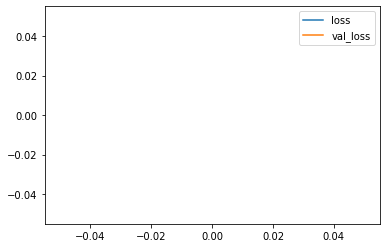

In [24]:

# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()


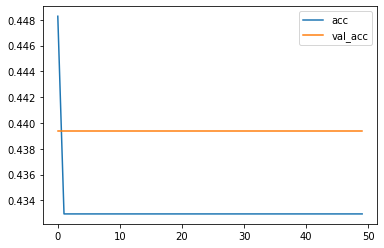

In [25]:
# accuracies
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [26]:
# Fit with data augmentation
# Note: if you run this AFTER calling the previous model.fit(), it will CONTINUE training where it left off
batch_size = 32
data_generator = image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, Y_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size
r = model.fit(train_generator, validation_data=(X_test, Y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
8/8 [==============================] - 2s 95ms/step - loss: nan - accuracy: 0.4192 - val_loss: nan - val_accuracy: 0.4394
Epoch 2/50
8/8 [==============================] - 0s 59ms/step - loss: nan - accuracy: 0.4105 - val_loss: nan - val_accuracy: 0.4394
Epoch 3/50
8/8 [==============================] - 0s 59ms/step - loss: nan - accuracy: 0.4410 - val_loss: nan - val_accuracy: 0.4394
Epoch 4/50
8/8 [==============================] - 0s 58ms/step - loss: nan - accuracy: 0.4323 - val_loss: nan - val_accuracy: 0.4394
Epoch 5/50
8/8 [==============================] - 1s 64ms/step - loss: nan - accuracy: 0.4454 - val_loss: nan - val_accuracy: 0.4394
Epoch 6/50
8/8 [==============================] - 0s 56ms/step - loss: nan - accuracy: 0.4192 - val_loss: nan - val_accuracy: 0.4394
Epoch 7/50
8/8 [==============================] - 0s 59ms/step - loss: nan - accuracy: 0.4323 - val_loss: nan - val_accuracy: 0.4394
Epoch 8/50
8/8 [==============================] - 1s 61ms/step - loss

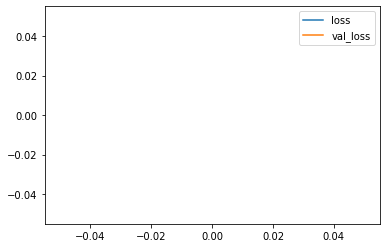

In [27]:
# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()


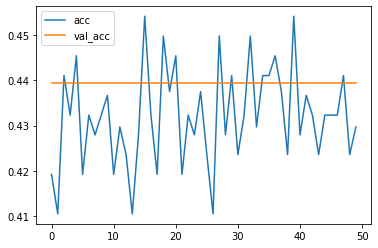

In [28]:
# accuracies
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [29]:
ynew = model.predict_classes(X_test)
print(ynew)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


In [30]:
N_test = len(ynew)

In [31]:
y_resp = (model.predict(X_test) > 0.5).astype("int32")
#print(y_resp)

In [32]:
# model.predict(X_test)

In [33]:
# (model.predict(X_test)[0] > 0.5).astype("int32")

In [34]:
y_class = np.zeros(N_test,dtype=int)
for k in range(N_test):
  for kk in range(K):
    if(Y_test[k,kk] == 1):
      y_class[k] = kk
print(y_class)
y_true = y_class.copy()

IndexError: ignored

In [ ]:
#Y_test[-2,:]

In [ ]:
y_class = np.zeros(N_test,dtype=int)
for k in range(N_test):
  for kk in range(K):
    if(y_resp[k,kk] == 1):
      y_class[k] = kk
y_pred = y_class.copy()

In [ ]:
#target_names = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
# print(classification_report(y_true, y_pred, target_names=target_names))
print(classification_report(y_true, y_pred))